In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("loan (1).csv")

print(df.to_string()) 

      Loan_ID  Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status
0    LP001002    Male      No          0      Graduate            No             5849           0.000000         NaN             360.0             1.0         Urban           Y
1    LP001003    Male     Yes          1      Graduate            No             4583        1508.000000       128.0             360.0             1.0         Rural           N
2    LP001005    Male     Yes          0      Graduate           Yes             3000           0.000000        66.0             360.0             1.0         Urban           Y
3    LP001006    Male     Yes          0  Not Graduate            No             2583        2358.000000       120.0             360.0             1.0         Urban           Y
4    LP001008    Male      No          0      Graduate            No             6000           0.000000       141.

In [2]:
df = df.dropna()
df = pd.get_dummies(df, columns=['Education'], prefix = ['Education'] , drop_first=True)
df = pd.get_dummies(df, columns=['Gender'], prefix = ['Gender'] , drop_first=True)
df = pd.get_dummies(df, columns=['Married'], prefix = ['Married'] , drop_first=True)
df = pd.get_dummies(df, columns=['Dependents'], prefix = ['Dependents'] , drop_first=True)
print(df.head())

    Loan_ID Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
1  LP001003            No             4583             1508.0       128.0   
2  LP001005           Yes             3000                0.0        66.0   
3  LP001006            No             2583             2358.0       120.0   
4  LP001008            No             6000                0.0       141.0   
5  LP001011           Yes             5417             4196.0       267.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  \
1             360.0             1.0         Rural           N   
2             360.0             1.0         Urban           Y   
3             360.0             1.0         Urban           Y   
4             360.0             1.0         Urban           Y   
5             360.0             1.0         Urban           Y   

   Education_Not Graduate  Gender_Male  Married_Yes  Dependents_1  \
1                       0            1            1             1   
2       

In [3]:
df = pd.get_dummies(df, columns=['Self_Employed'], prefix = ['Self_Employed'] , drop_first=True)
df = pd.get_dummies(df, columns=['Property_Area'], prefix = ['Property_Area'] , drop_first=True)


In [4]:
df = pd.get_dummies(df, columns=['Loan_Status'], prefix = ['Loan_Status'] , drop_first=True)

df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Not Graduate,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,0,1,1,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
4,LP001008,6000,0.0,141.0,360.0,1.0,0,1,0,0,0,0,0,0,1,1
5,LP001011,5417,4196.0,267.0,360.0,1.0,0,1,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,LP002978,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
521,LP002979,4106,0.0,40.0,180.0,1.0,0,1,1,0,0,1,0,0,0,1
522,LP002983,8072,240.0,253.0,360.0,1.0,0,1,1,1,0,0,0,0,1,1
523,LP002984,7583,0.0,187.0,360.0,1.0,0,1,1,0,1,0,0,0,1,1


In [5]:
features = df[[ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Education_Not Graduate', 'Gender_Male','Dependents_1','Dependents_2','Dependents_3+','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban']]
target = df['Loan_Status_Y']

In [6]:
target


1      0
2      1
3      1
4      1
5      1
      ..
520    1
521    1
522    1
523    1
524    0
Name: Loan_Status_Y, Length: 410, dtype: uint8

(array([[410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [213., 135.,  35.,  12.,  11.,   1.,   0.,   0.,   1.,   2.],
        [370.,  35.,   4.,   0.,   0.,   0.,   0.,   0.,   1.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [410.,   0.,

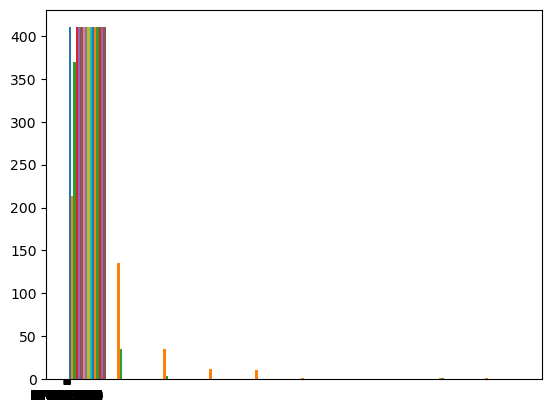

In [7]:
plt.hist(df)

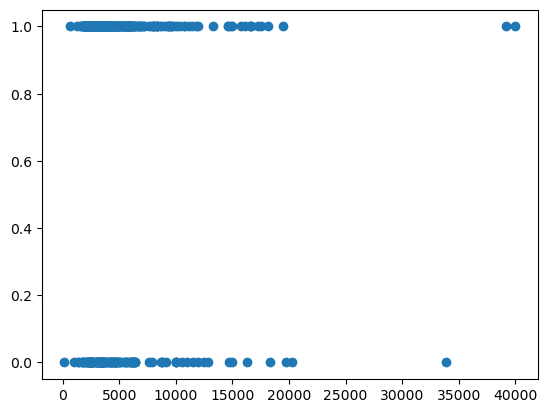

In [8]:
plt.scatter(df['ApplicantIncome'],df['Loan_Status_Y'])

In [150]:
from sklearn.model_selection import train_test_split, GridSearchCV
df.dropna()
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size= 0.25,random_state=32)


In [153]:
df.isnull().sum()


Loan_ID                    0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Education_Not Graduate     0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

<Axes: >

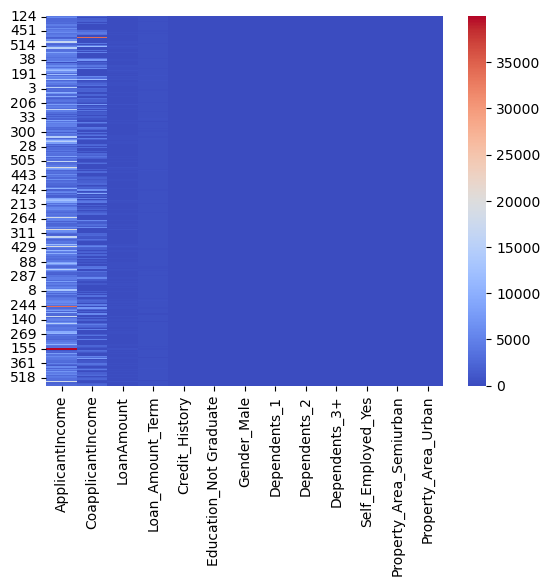

In [154]:
import seaborn as sns
sns.heatmap(X_train, cmap='coolwarm')

In [155]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [156]:
LR = LogisticRegression(penalty = 'l2',C=1, max_iter=1000)


In [157]:
LR.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=1000)

In [158]:
LR.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=uint8)

In [159]:
LR.score(X_train,y_train)

0.8045602605863192

In [160]:
LR.score(X_test,y_test)

0.8058252427184466

In [173]:
import numpy as np
params = {'C' : np.logspace(-4, 4, 20),
          'penalty' : ['l2'],
          'solver': ['lbfgs', 'liblinear']}
model = LogisticRegression(max_iter=100000)
grid_search = GridSearchCV(model, param_grid=params, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
             return_train_score=True)

In [174]:
best_parameters = grid_search.best_params_


In [175]:
best_score = grid_search.best_score_


In [176]:
print('Best parameters:', best_parameters)
print('Best score:', best_score)

Best parameters: {'C': 11.288378916846883, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.7980645161290323


In [183]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [184]:
svc = SVC(kernel='rbf', C=10)


In [185]:
from sklearn.ensemble import StackingClassifier


In [180]:
models = [('DT',DT),('SVC',svc),('grid_search',grid_search)]
stack = StackingClassifier(models,final_estimator=LogisticRegression(), cv=10)

In [181]:
stack.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('DT',
                                DecisionTreeClassifier(criterion='entropy')),
                               ('SVC', SVC(C=10)),
                               ('grid_search',
                                GridSearchCV(cv=10,
                                             estimator=LogisticRegression(max_iter=100000),
                                             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                                         'penalty': ['l2'],
                                                         'solver': ['lbfgs',
                                                                    'liblinear']},
                                             return_train_score=True))],
                   final_estimator=LogisticRegression())

In [186]:
print(stack.score(X_train,y_train), stack.score(X_test,y_test))


0.8143322475570033 0.8058252427184466


In [187]:
predictions = stack.predict(X_test)


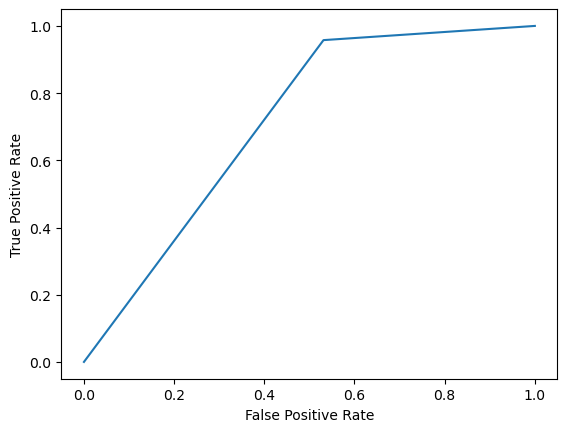

In [188]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

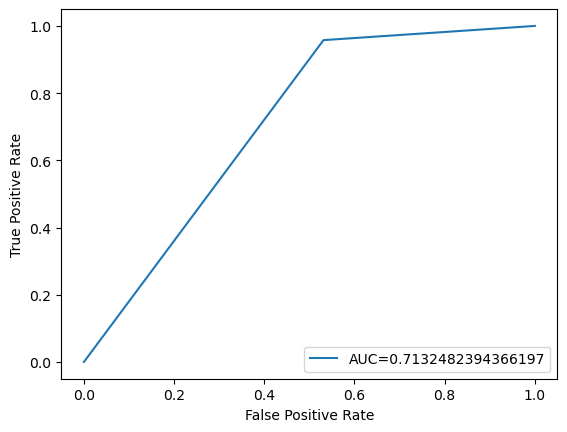

In [189]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [190]:
training_scores = grid_search.cv_results_['mean_train_score']
validation_scores = grid_search.cv_results_['mean_test_score']


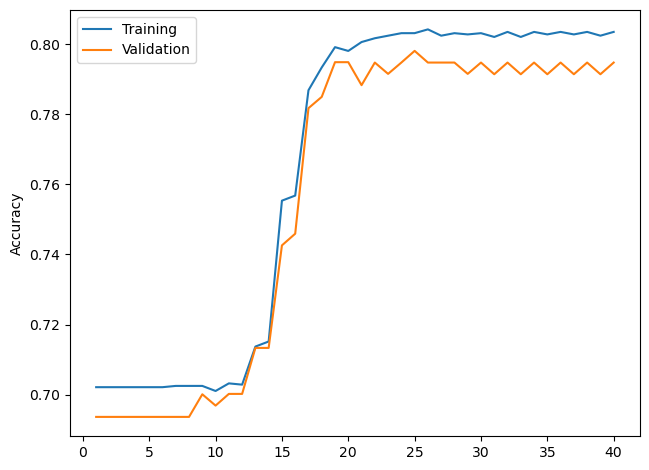

In [191]:
plt.plot(np.arange(1, len(training_scores) + 1), training_scores, label='Training')
plt.plot(np.arange(1, len(validation_scores) + 1), validation_scores, label='Validation')
plt.tight_layout()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [192]:
from sklearn.metrics import precision_score

In [193]:
precision = precision_score(y_test, predictions)
print('Precision:', precision)

Precision: 0.8
